# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [65]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [66]:
#your code here
wnba_clean = pd.read_csv('C:\\Users\\guilh\\M2-mini-project2\\data\wnba_clean.csv')

# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [67]:
# your answer here
"""
1.requirements that your sample must satisfy in order to be used to infer the average weight:

    1.1 Elements of the sample should come from the population
    1.2 Sample should be a representative of the larger population
    1.3 Individual samples should be independent between each other
******************************************************************************************    
2.Do you feel it actually fulfills those requirements? 

2.1 Yes, the elements of the sample come from the population

2.2 We could say Yes, because taking in account that the professional leagues in the world have players with similar heights in average
,we could assume that in average the other characteristics are identical.

2.3 Yes, the players are independent from each other, a individual sample is ndependent between each other
*********************************************************************************************************
3.Do you need to make any assumptions?

That the players in other professional leagues have similar characteristics
***************************************************************************************************
4.We could calculate a confidence interval to do the inference, but do you know any other ways?

1.One sample hypothesis testing.
2.Pearson Correlation.
3.Bi-variate regression.
4.Multi-variate regression.
5.Chi-square statistics and contingency table.
6.ANOVA or T-test.

"""

'\n1.requirements that your sample must satisfy in order to be used to infer the average weight:\n\n    1.1 Elements of the sample should come from the population\n    1.2 Sample should be a representative of the larger population\n    1.3 Individual samples should be independent between each other\n******************************************************************************************    \n2.Do you feel it actually fulfills those requirements? \n\n2.1 Yes, the elements of the sample come from the population\n\n2.2 We could say Yes, because taking in account that the professional leagues in the world have players with similar heights in average\n,we could assume that in average the other characteristics are identical.\n\n2.3 Yes, the players are independent from each other, a individual sample is ndependent between each other\n*********************************************************************************************************\n3.Do you need to make any assumptions?\n\nThat the 

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

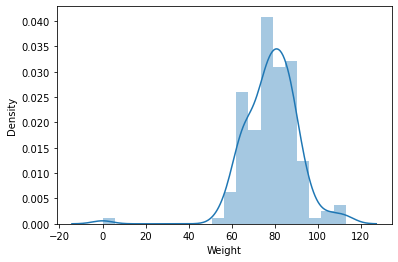

In [68]:
# your code here
import seaborn as sns
#checking how is the distribution of the sample
sns.distplot(wnba_clean['Weight'])

##### A)Creating the confidence interval (hard way)

In [69]:
# your code here

# To create our interval at 95% confidence we need
# 1. The mean of the sample
# 2. The number of observation
# 3. The std of the original distribution

# 1. The mean of the sample
mean = wnba_clean['Weight'].mean()
# 2. The number of observation
n = wnba_clean['Weight'].count()
# 3. The std of the original distribution
std = wnba_clean['Weight'].std()

#construct of 95.5% confidence interval

print("left end: ", mean - 2* (std/np.sqrt(n)))
print("right end: ", mean + 2* (std/np.sqrt(n)))

print("\nThe sample size is: ",n)

left end:  76.28682015112898
right end:  80.56632670201788

The sample size is:  143


#### B) Computing the confidence interval using the python module scipy.stats (easy way)

## check the sample size to see if we calculate confidence interval for mean using t-distribution or normal distribution

statsmodels.stats.proportion.proportion_confint(count, nobs, alpha=0.05, method='normal')[source]¶
confidence interval for a binomial proportion

2.If **sample size (n>30)** we will use the **normal distribution** to calculate the confidence intervals for the mean
by assuming the sample mean is normally distributed due to central limit theorem.

Since sample size is 143 ( > 30 ),we are **assuming** the **sample** is **normally distributed** due to central limit theorem.

In [70]:
# your code here
st.norm.interval(0.955,loc=mean,scale=std/np.sqrt(n))

(76.28184045122534, 80.57130640192152)

**What can you say about these results?**

In [71]:
#your-answer-here
#I can say with 95.5% of condifence that the average weight of a player is between 76 kg and 80 kg

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [72]:
#your-answer-here
#I would say that she is probably right, because in average the players have a weight between 76 kg and 80 kg

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


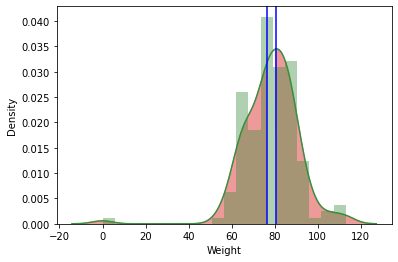

In [73]:
#left end of confidence interval
x0 = 76.28184045122534

#right end of confidence interval
x1 = 80.57130640192152

 
#plotting the PDF (do this before plotting anything else)
ax = sns.distplot(wnba_clean['Weight'], hist=True,color='#388E3C')
kde_x, kde_y = ax.lines[0].get_data()

#plotting the two lines where in between we have the values for the confidence interval
p1 = plt.axvline(x=x0,color='blue')
p2 = plt.axvline(x=x1,color='blue')


ax.fill_between(kde_x, kde_y, where=(kde_x<x0) | (kde_x>x1) , 
                interpolate=True, color='#EF9A9A')

plt.show()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [74]:
# your answer here
"""Requirements
1. The population is representative of the population? YES (I assume)
2. Elements of the sample come from the population? YES
3. Individual samples are independent between each other? YES

"""

'Requirements\n1. The population is representative of the population? YES (I assume)\n2. Elements of the sample come from the population? YES\n3. Individual samples are independent between each other? YES\n\n'

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

# In order to to infer the proportion of players that miss more than 40% of their free throws, we need to have a subset with only the players that miss more than 40%

In [75]:
# FT% = FTM(Free throws made)/FTA(free throws attempt)
#FT% gives the percentage of success
# selects s subset of the dataframe based on the condition of players that fail more than 40%
wnba_2 = wnba_clean.loc[wnba_clean['FT%']< 60]

## Compute the confidence interval of the proportion with a confidence level of 95%

We are going to use the:
**statsmodels.stats.proportion.proportion_confint(count, nobs, alpha=0.05, method='normal')** ->confidence interval for a binomial proportion

Parameters:
- **count** : number of successes
- **nobs** : total number of trials
- **alpha** : significance level
- **method** : {‘normal’, ‘agresti_coull’, ‘beta’, ‘wilson’, ‘binom_test’}
binomial proportion confidence interval is a confidence interval for the probability of success calculated from the outcome of a series of success–failure experiments (Bernoulli trials)

In [76]:
#number of successes, players that fail more than 40%
count = len(wnba_2)

# total number of trials,elements in the column Free Throws %
nobs = len(wnba_clean['FT%'])

#significance level of 0.05, it means for a confidence level of 95%, 1-0.95 = 0.05
alpha = 0.05 

#asymptotic normal approximation -> asymptotic normality is a generalization of the central limit theorem
method = 'normal'

from statsmodels.stats import proportion

#compute the confience interval
proportion.proportion_confint(count,nobs,alpha=0.05,method='normal') 

(0.05467303025337226, 0.15511717953683754)

**What can you comment about our result? What would you tell your sister?**

In [77]:
#your-answer-here
#It is not very probable that players would miss 40% of the times,i can say with confidence that in average the percentage
#of players that fail free throws are between 5% and 15%

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [78]:
wnba_2['FT%'].describe()

count    15.000000
mean     33.633333
std      25.469552
min       0.000000
25%       0.000000
50%      50.000000
75%      53.550000
max      58.300000
Name: FT%, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FT%', ylabel='Density'>

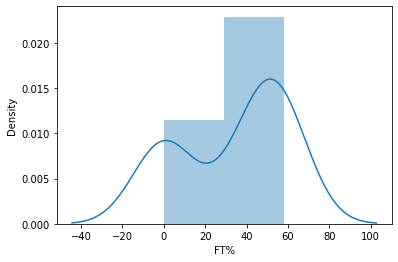

In [79]:
#your code here
sns.distplot(wnba_2['FT%'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


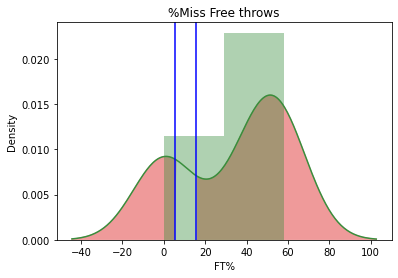

In [80]:
#your code here


#left end of confidence interval
x0 = 0.05467303025337226*100

#right end of confidence interval
x1 = 0.15511717953683754*100

 
#plotting the PDF (do this before plotting anything else)
ax = sns.distplot(wnba_2['FT%'], hist=True,color='#388E3C')
kde_x, kde_y = ax.lines[0].get_data()

#plotting the two lines where in between we have the values for the confidence interval
p1 = plt.axvline(x=x0,color='blue')
p2 = plt.axvline(x=x1,color='blue')


ax.fill_between(kde_x, kde_y, where=(kde_x<x0) | (kde_x>x1) , 
                interpolate=True, color='#EF9A9A')
ax.title.set_text('%Miss Free throws')
plt.show()

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

<font size="3"> Your brother-in-law is convinced that the average assists for female professional players is higher than the **average** of both female and male players combined (which is **52** for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

 **How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**<font>



**In order to conduct a hypothesis test we need to meet certain assumptions:**

- Our observations must be **independent of each other**. For example, if we have people who live in the same household participating in a medical trial, they might be exposed to the same environmental conditions or eat the same food. This can bias our results.


- **Normality of data** - We assume that the sample is derived from a normally distributed data.


- **Adequate sample size**. In order to perform a test using the normal distribution and not approximate to the t distribution, our sample size must be greater than 30.


- In order to use the **normal distribution for our hypothesis test**, we must assume the population standard deviation is known. If the population standard deviation is not known, then we use the t-distribution for the hypothesis tes

## **Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AST', ylabel='Density'>

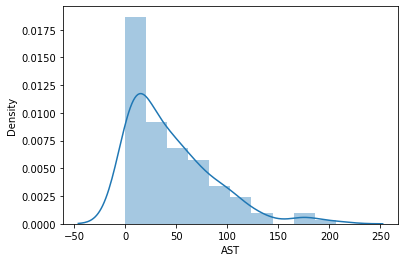

In [92]:
sns.distplot(wnba_clean['AST'])

In [82]:
#hypotheses
#H0: \mu_1 >= 52 #average assists for female professional players is higher than the average of both female and male players combined

#H1 \mu_1 !< 52

Scipy library has a function for one sample hypothesis tests called **ttest_1samp**. This test takes a dataset and a constant for comparison and returns the test statistic and the p value for a **2 sided test or two-tailed**.

In [95]:
#your code here
#from scipy.stats import ttest_1samp  -> this library was imported in the begining of the lab

Test_2 = ttest_1samp(wnba_clean['AST'],52)
Test_2 

Ttest_1sampResult(statistic=-2.2396270335095663, pvalue=0.02666926483570908)

In [102]:
#your-answer-here

#p-value of the test is below 0.05, so we can reject the null hypothesis in favor of the alternative one

#My brother-in-law is making a wrong assumption that the average assists for female professional players
#is higher than the average of both female and male players combined

## **Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In scipy there is no direct way to indicate that we want to run a one-tailed variant of the test, we simply need to divide the p-value by 2 (the test statistic stays the same).


Resume : When using the ttest_1samp the default test is double sided, so if we are doing a uni-sided test we need to divide the p by 2 for our one-tailed test. p/2 < alpha

In [97]:
#your code here

# p/2 
Test_2.pvalue/2  #Get the p value for one-tailed one sample t-test


0.01333463241785454

In [100]:
#your-answer-here

#With the obtained p-value < 0.05 <we have reasons to reject the null hypothesis in favor of the alternative.

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [ ]:
#your code here

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here

In [19]:
# your code here

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here